In [1]:
from __future__ import absolute_import, division, print_function

import os
import matplotlib.pyplot as plt

import tensorflow as tf

tf.enable_eager_execution()

print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 1.12.0
Eager execution: True


In [2]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))

8192/2194 [================================================================================================================] - 0s 0us/step
Local copy of the dataset file: /home/iscman/.keras/datasets/iris_training.csv


In [3]:
!head -n5 {train_dataset_fp}

120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0


In [4]:
# column order in CSV file
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


In [5]:
feature_names.tail(5)

AttributeError: 'list' object has no attribute 'tail'

In [6]:
batch_size = 32

train_dataset = tf.contrib.data.make_csv_dataset(
    train_dataset_fp,
    batch_size, 
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)

Instructions for updating:
Use `tf.data.experimental.make_csv_dataset(...)`.


In [10]:
features, labels = next(iter(train_dataset))

In [11]:
features

OrderedDict([('sepal_length',
              <tf.Tensor: id=68, shape=(32,), dtype=float32, numpy=
              array([6.7, 5.8, 4.9, 6.5, 6.6, 6.4, 5. , 4.6, 5.1, 5. , 6.7, 6.3, 4.7,
                     4.6, 6.3, 6.8, 5.4, 4.8, 5.3, 6.4, 6.3, 5.7, 5.1, 5.1, 6.1, 5.4,
                     6.2, 5.7, 6.9, 7.2, 5. , 5.7], dtype=float32)>),
             ('sepal_width',
              <tf.Tensor: id=69, shape=(32,), dtype=float32, numpy=
              array([3.3, 2.7, 2.5, 3. , 3. , 3.2, 2. , 3.2, 3.8, 3.4, 3. , 2.7, 3.2,
                     3.1, 2.3, 3.2, 3.4, 3.1, 3.7, 3.2, 2.5, 2.8, 3.7, 3.5, 2.8, 3.7,
                     2.2, 2.9, 3.2, 3. , 2.3, 3. ], dtype=float32)>),
             ('petal_length',
              <tf.Tensor: id=66, shape=(32,), dtype=float32, numpy=
              array([5.7, 5.1, 4.5, 5.2, 4.4, 5.3, 3.5, 1.4, 1.6, 1.5, 5. , 4.9, 1.3,
                     1.5, 4.4, 5.9, 1.5, 1.6, 1.5, 4.5, 5. , 4.1, 1.5, 1.4, 4. , 1.5,
                     4.5, 4.2, 5.7, 5.8, 3.3, 4.2],

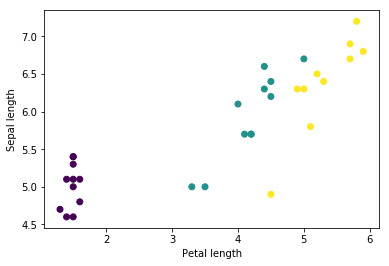

In [12]:
plt.scatter(features['petal_length'].numpy(),
            features['sepal_length'].numpy(),
            c=labels.numpy(),
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length");

In [13]:
def pack_features_vector(features, labels):
  """Pack the features into a single array."""
  features = tf.stack(list(features.values()), axis=1)
  return features, labels

In [14]:
train_dataset = train_dataset.map(pack_features_vector)

In [15]:
train_dataset

<MapDataset shapes: ((?, 4), (?,)), types: (tf.float32, tf.int32)>

In [16]:
features, labels = next(iter(train_dataset))

print(features[:5])

tf.Tensor(
[[4.9 3.1 1.5 0.1]
 [6.9 3.1 5.1 2.3]
 [7.7 2.6 6.9 2.3]
 [6.1 2.8 4.7 1.2]
 [6.4 2.7 5.3 1.9]], shape=(5, 4), dtype=float32)


In [17]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),  # input shape required
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dense(3)
])

In [18]:
predictions = model(features)
predictions[:5]

<tf.Tensor: id=201, shape=(5, 3), dtype=float32, numpy=
array([[-0.13342428,  1.8331707 , -1.2862233 ],
       [-0.24145567,  1.7453821 , -2.1253326 ],
       [ 0.26332337,  1.7668191 , -2.464774  ],
       [-0.14566845,  1.7496393 , -1.9611598 ],
       [-0.04695559,  1.5899423 , -2.0444267 ]], dtype=float32)>

In [19]:
tf.nn.softmax(predictions[:5])

<tf.Tensor: id=207, shape=(5, 3), dtype=float32, numpy=
array([[0.11817463, 0.8445115 , 0.03731385],
       [0.11842117, 0.86357886, 0.01799998],
       [0.17976794, 0.8084853 , 0.01174667],
       [0.12792051, 0.8512594 , 0.02082008],
       [0.1593656 , 0.81901205, 0.0216224 ]], dtype=float32)>

In [20]:
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))

Prediction: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
    Labels: [0 2 2 1 2 0 1 0 0 1 1 0 1 2 2 1 2 0 2 1 2 2 1 0 0 1 0 2 2 0 2 1]


In [21]:
def loss(model, x, y):
  y_ = model(x)
  return tf.losses.sparse_softmax_cross_entropy(labels=y, logits=y_)


l = loss(model, features, labels)
print("Loss test: {}".format(l))

Loss test: 2.153578996658325


In [22]:
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [23]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

global_step = tf.Variable(0)

In [24]:
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(global_step.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables), global_step)

print("Step: {},         Loss: {}".format(global_step.numpy(),
                                          loss(model, features, labels).numpy()))

Step: 0, Initial Loss: 2.153578996658325
Step: 1,         Loss: 1.6711437702178955


In [25]:
## Note: Rerunning this cell uses the same model variables

from tensorflow import contrib
tfe = contrib.eager

# keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tfe.metrics.Mean()
  epoch_accuracy = tfe.metrics.Accuracy()

  # Training loop - using batches of 32
  for x, y in train_dataset:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables),
                              global_step)

    # Track progress
    epoch_loss_avg(loss_value)  # add current batch loss
    # compare predicted label to actual label
    epoch_accuracy(tf.argmax(model(x), axis=1, output_type=tf.int32), y)

  # end epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())
  
  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 1.513, Accuracy: 31.667%
Epoch 050: Loss: 0.452, Accuracy: 93.333%
Epoch 100: Loss: 0.310, Accuracy: 95.000%
Epoch 150: Loss: 0.213, Accuracy: 97.500%
Epoch 200: Loss: 0.161, Accuracy: 98.333%


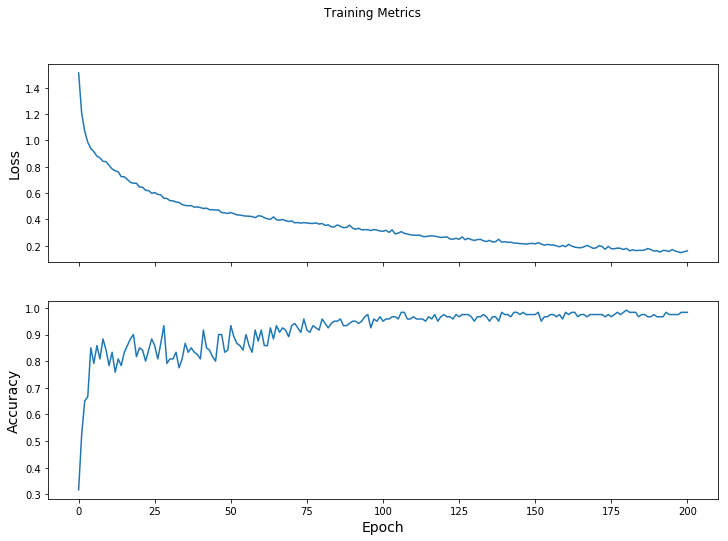

In [26]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results);

In [27]:
test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url),
                                  origin=test_url)

8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step


In [28]:
test_dataset = tf.contrib.data.make_csv_dataset(
    test_fp,
    batch_size, 
    column_names=column_names,
    label_name='species',
    num_epochs=1,
    shuffle=False)

test_dataset = test_dataset.map(pack_features_vector)

In [29]:
test_accuracy = tfe.metrics.Accuracy()

for (x, y) in test_dataset:
  logits = model(x)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 93.333%


In [30]:
tf.stack([y,prediction],axis=1)

<tf.Tensor: id=122819, shape=(30, 2), dtype=int32, numpy=
array([[1, 1],
       [2, 2],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [2, 2],
       [1, 1],
       [2, 2],
       [2, 2],
       [0, 0],
       [2, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 2],
       [2, 2],
       [1, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1]], dtype=int32)>

In [31]:
predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])

predictions = model(predict_dataset)

for i, logits in enumerate(predictions):
  class_idx = tf.argmax(logits).numpy()
  p = tf.nn.softmax(logits)[class_idx]
  name = class_names[class_idx]
  print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

NameError: name 'class_names' is not defined